In [3]:
import pymysql
import pandas as pd
from surprise import KNNBasic, SVD, SVDpp, NMF, Reader, Dataset
from surprise.model_selection import cross_validate

import numpy as np
import matplotlib.pyplot as plt

In [2]:
con = pymysql.connect(host = '127.0.0.1', user = 'root', password = 'kyjin0413!',
                       db = 'lpointsample', charset = 'utf8')
cur = con.cursor(pymysql.cursors.DictCursor)
cur.execute(
    "SELECT 고객정보.cust, ma_fem_dv, ages, buy_am FROM 고객정보, 상품구매정보_view where 고객정보.cust = 상품구매정보_view.cust")
result=cur.fetchall()
con.commit()
con.close()
df= pd.DataFrame(result)
print(df.head(10))

         cust ma_fem_dv ages  buy_am
0  M117855953        여성  30대  759500
1  M122284480        여성  40대   69000
2  M046283586        여성  50대   54000
3  M019728616        여성  30대  357000
4  M052658222        남성  40대   76000
5  M061879808        여성  40대   12900
6  M061879808        여성  40대   12900
7  M061879808        여성  40대   12900
8  M061879808        여성  40대   12900
9  M049345995        여성  20대   13500


In [4]:
X = df.iloc[:,:].values
# X = dataset.values
# X = dataset.to_numpy() # 공식홈페이지 권장
X[:5]

array([['M117855953', '여성', '30대', 759500],
       ['M122284480', '여성', '40대', 69000],
       ['M046283586', '여성', '50대', 54000],
       ['M019728616', '여성', '30대', 357000],
       ['M052658222', '남성', '40대', 76000]], dtype=object)

c:\Users\ASIA-08\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


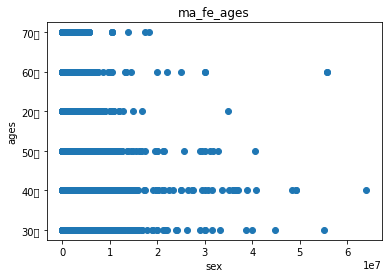

In [10]:
# 연령 / 소비금액
plt.scatter(X[:, 3], X[:, 2]) # x축: hour y축: score
plt.title('ma_fe_ages')
plt.xlabel('sex')
plt.ylabel('ages')
plt.show()

c:\Users\ASIA-08\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


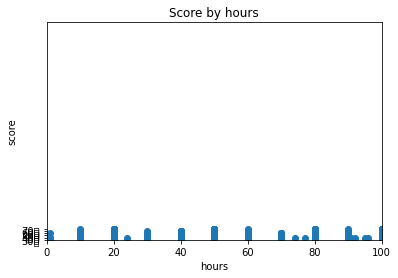

In [15]:
plt.scatter(X[:, 3], X[:, 2]) # x축: hour y축: score
plt.title('Score by hours')
plt.xlabel('hours')
plt.xlim(0, 100)
plt.ylabel('score')
plt.ylim(0, 100)
plt.show()